In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(houseData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [4]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseGrLivArea.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [5]:
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
houseSalePrice.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


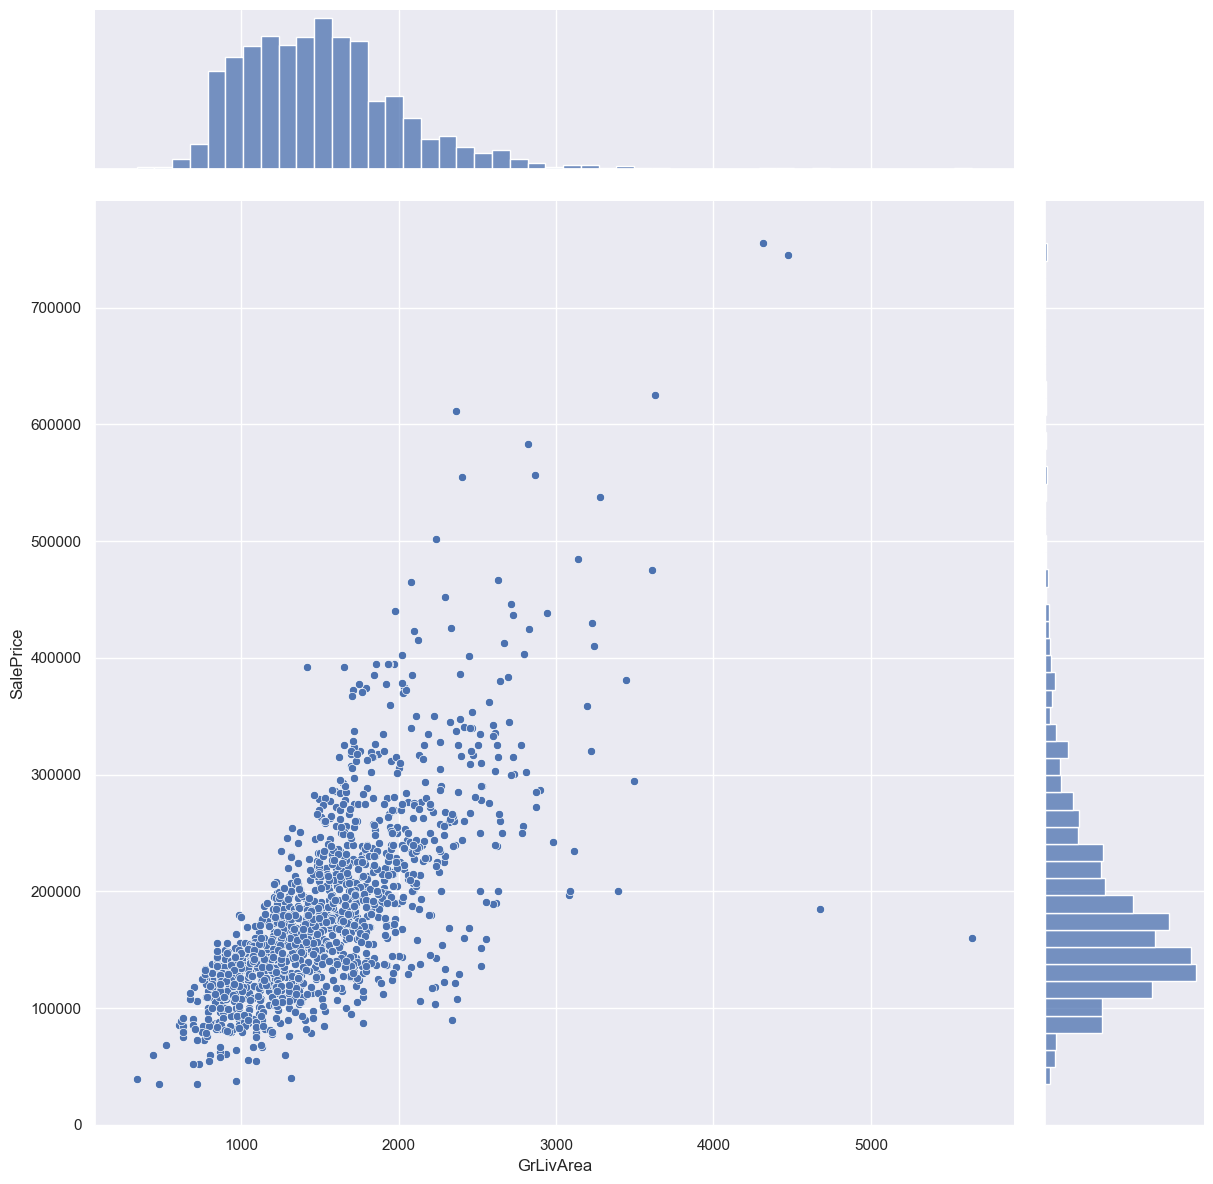

In [6]:
trainData = pd.concat([houseSalePrice, houseGrLivArea], axis = 1).reindex(houseSalePrice.index)
sb.jointplot(data = trainData, x ='GrLivArea' , y = 'SalePrice', height = 12)

In [7]:
trainData.corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])

houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])
houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])

print("Train Set :", houseSalePrice_train.shape, houseGrLivArea_train.shape)
print("Test Set  :", houseSalePrice_test.shape, houseGrLivArea_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [10]:
linreg = LinearRegression()

In [11]:
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression()

In [12]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


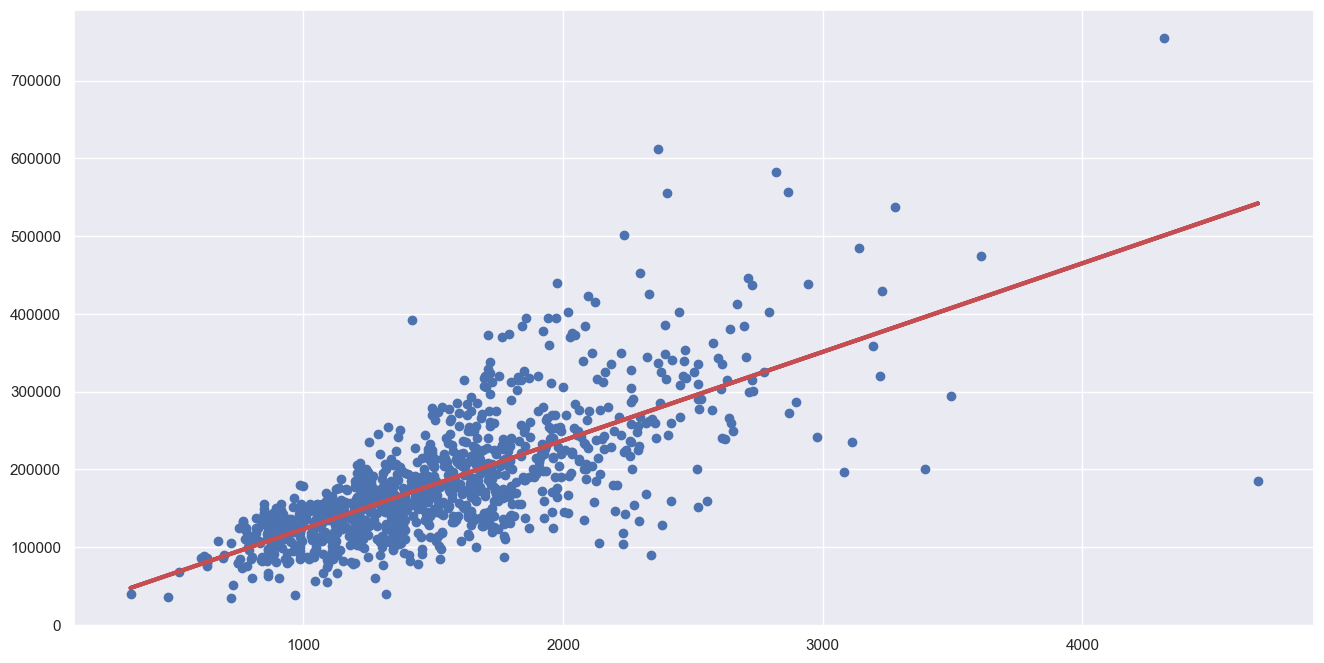

In [13]:
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

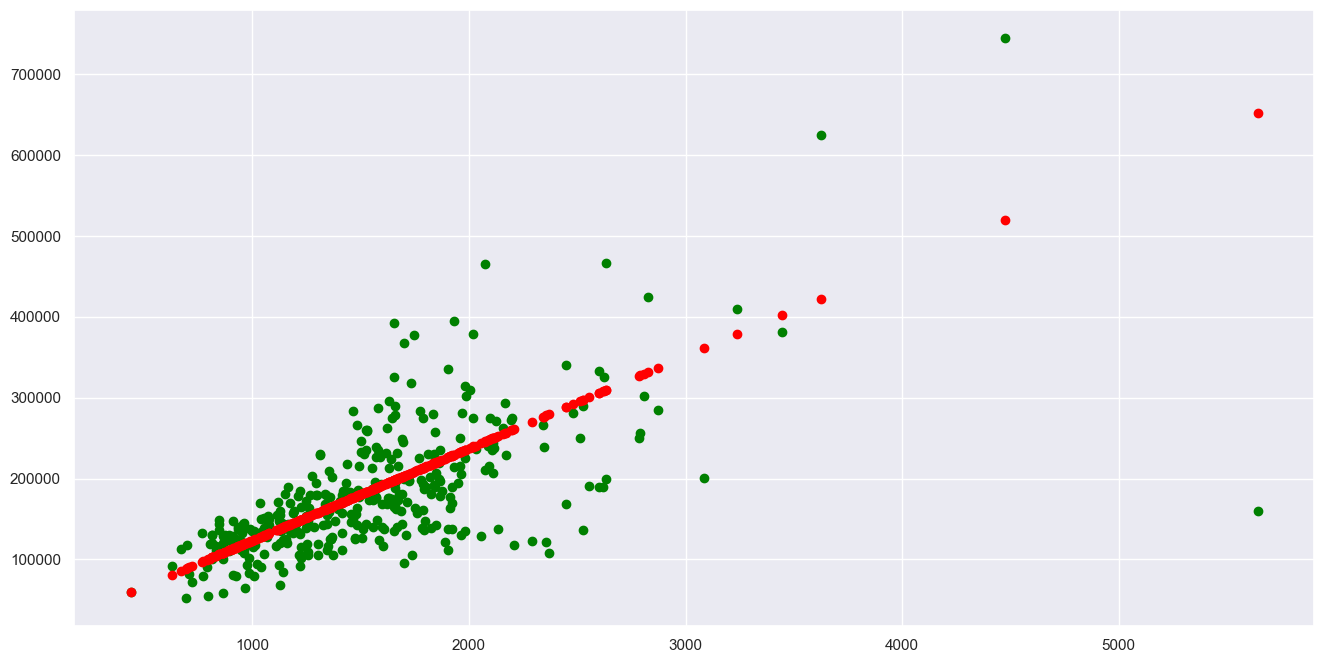

In [17]:
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

In [20]:
print("Train Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))
print("Test Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

Train Explained Variance (R^2) 	: 0.5317704755454566
Test Explained Variance (R^2) 	: 0.40117720006925794
